In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm, skew
from scipy import stats

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sub = pd.read_csv('sample_submission.csv')

- CRIM: 도시별 1인당 범죄율  
- ZN: 25,000 피트를 초과하는 주거용 토지의 비율  
- NDUS: 비상업 면적의 비율  
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)  
- NOX: 일산화질소 농도  
- RM: 주택당 평균 방의 개수  
- AGE: 1940년 이전에 건축된 자가주택의 비율  
- DIS: 5개의 보스턴 고용 센터와의 거리  
- RAD: 고속도로 접근성 지수  
- TAX: 10,000달러당 재산세율  
- PTRATIO: 도시별 교사와 학생 수 비율  
- B: 마을의 흑인 거주 비율  
- LSTAT: 하위 계층의 비율  
- MEDV: 본인 소유의 주택 가격(중앙값, 단위: 천달러)  

In [ ]:
df_train.head(3)

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,TRAIN_000,0.048,80.000,3.640,0.000,0.392,6.108,32.000,9.220,1.000,315.000,16.400,392.890,6.570,21.900
1,TRAIN_001,1.425,0.000,19.580,0.000,0.871,6.510,100.000,1.766,5.000,403.000,14.700,364.310,7.390,23.300
2,TRAIN_002,0.018,95.000,1.470,0.000,0.403,7.135,13.900,7.653,3.000,402.000,17.000,384.300,4.450,32.900


In [ ]:
df_test.head(3)

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,TEST_000,0.111,0.000,13.890,1.000,0.550,5.951,93.800,2.889,5.000,276.000,16.400,396.900,17.920
1,TEST_001,6.539,0.000,18.100,1.000,0.631,7.016,97.500,1.202,24.000,666.000,20.200,392.050,2.960
2,TEST_002,5.441,0.000,18.100,0.000,0.713,6.655,98.200,2.355,24.000,666.000,20.200,355.290,17.730


In [ ]:
df_sub.head(3)

,ID,MEDV
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0


In [ ]:
df_train.columns = df_train.columns.str.lower()
df_test.columns = df_test.columns.str.lower()

세부사항 파악

In [ ]:
df_train.tail()

,id,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
450,TRAIN_450,0.340,22.000,5.860,0.000,0.431,6.108,34.900,8.056,7.000,330.000,19.100,390.180,9.160,24.300
451,TRAIN_451,3.837,0.000,18.100,0.000,0.770,6.251,91.100,2.296,24.000,666.000,20.200,350.650,14.190,19.900
452,TRAIN_452,0.207,0.000,27.740,0.000,0.609,5.093,98.000,1.823,4.000,711.000,20.100,318.430,29.680,8.100
453,TRAIN_453,0.093,0.000,25.650,0.000,0.581,5.961,92.900,2.087,2.000,188.000,19.100,378.090,17.930,20.500
454,TRAIN_454,25.941,0.000,18.100,0.000,0.679,5.304,89.100,1.647,24.000,666.000,20.200,127.360,26.640,10.400


In [ ]:
df_train.shape  # 455개의 데이터

(455, 15)

In [ ]:
df_train.isnull().sum()  # null 값은 존재하지 않음

id         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       455 non-null    object 
 1   crim     455 non-null    float64
 2   zn       455 non-null    float64
 3   indus    455 non-null    float64
 4   chas     455 non-null    float64
 5   nox      455 non-null    float64
 6   rm       455 non-null    float64
 7   age      455 non-null    float64
 8   dis      455 non-null    float64
 9   rad      455 non-null    float64
 10  tax      455 non-null    float64
 11  ptratio  455 non-null    float64
 12  b        455 non-null    float64
 13  lstat    455 non-null    float64
 14  medv     455 non-null    float64
dtypes: float64(14), object(1)
memory usage: 53.4+ KB


In [ ]:
df_train.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000,455.000
mean,3.660,11.166,11.093,0.066,0.555,6.285,68.320,3.788,9.552,407.892,18.454,356.286,12.605,22.575
std,8.888,22.954,6.822,0.248,0.117,0.699,27.894,2.082,8.719,169.447,2.149,92.664,7.090,9.121
min,0.006,0.000,0.460,0.000,0.389,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.079,0.000,5.160,0.000,0.449,5.881,44.700,2.100,4.000,278.000,17.400,375.990,6.970,17.100
50%,0.245,0.000,9.690,0.000,0.538,6.208,76.700,3.199,5.000,330.000,19.000,391.700,11.280,21.200
75%,3.686,12.500,18.100,0.000,0.624,6.627,93.850,5.165,24.000,666.000,20.200,396.375,16.695,25.100
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,36.980,50.000


In [ ]:
df_train[df_train.duplicated() == True]  # 중복값 없음

,id,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='medv', ylabel='Density'>

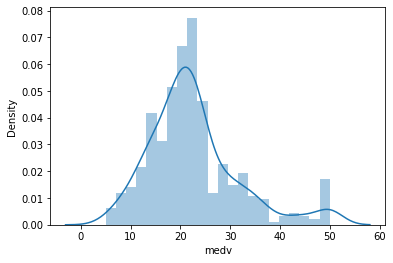

In [ ]:
sns.distplot(df_train['medv'])

In [ ]:
df_train.columns

Index(['id', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [ ]:
train_ID = df_train['id']
test_ID = df_test["id"]

df_train = df_train.drop(['id'], axis=1)
df_test = df_test.drop(['id'], axis=1)

print(df_train.head(3))
print('\n')
print(df_test.head(3))

   crim     zn  indus  chas   nox    rm     age   dis   rad     tax  ptratio  \
0 0.048 80.000  3.640 0.000 0.392 6.108  32.000 9.220 1.000 315.000   16.400   
1 1.425  0.000 19.580 0.000 0.871 6.510 100.000 1.766 5.000 403.000   14.700   
2 0.018 95.000  1.470 0.000 0.403 7.135  13.900 7.653 3.000 402.000   17.000   

        b  lstat   medv  
0 392.890  6.570 21.900  
1 364.310  7.390 23.300  
2 384.300  4.450 32.900  


   crim    zn  indus  chas   nox    rm    age   dis    rad     tax  ptratio  \
0 0.111 0.000 13.890 1.000 0.550 5.951 93.800 2.889  5.000 276.000   16.400   
1 6.539 0.000 18.100 1.000 0.631 7.016 97.500 1.202 24.000 666.000   20.200   
2 5.441 0.000 18.100 0.000 0.713 6.655 98.200 2.355 24.000 666.000   20.200   

        b  lstat  
0 396.900 17.920  
1 392.050  2.960  
2 355.290 17.730  


In [ ]:
print("훈련 데이터의 행의 개수는 {}, 열의 개수는 {}입니다.".format(df_train.shape[0], df_train.shape[1]))
print('\n')
print("테스트 데이터의 행의 개수는 {}, 열의 개수는 {}입니다.".format(df_test.shape[0], df_test.shape[1]))

훈련 데이터의 행의 개수는 455, 열의 개수는 14입니다.


테스트 데이터의 행의 개수는 51, 열의 개수는 13입니다.


<AxesSubplot:>

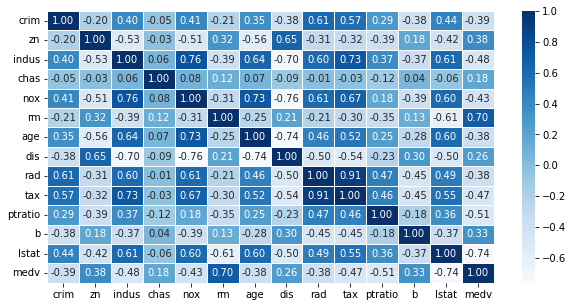

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data=df_train.corr(), annot=True,
           fmt='.2f', linewidth=.5, cmap='Blues')

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


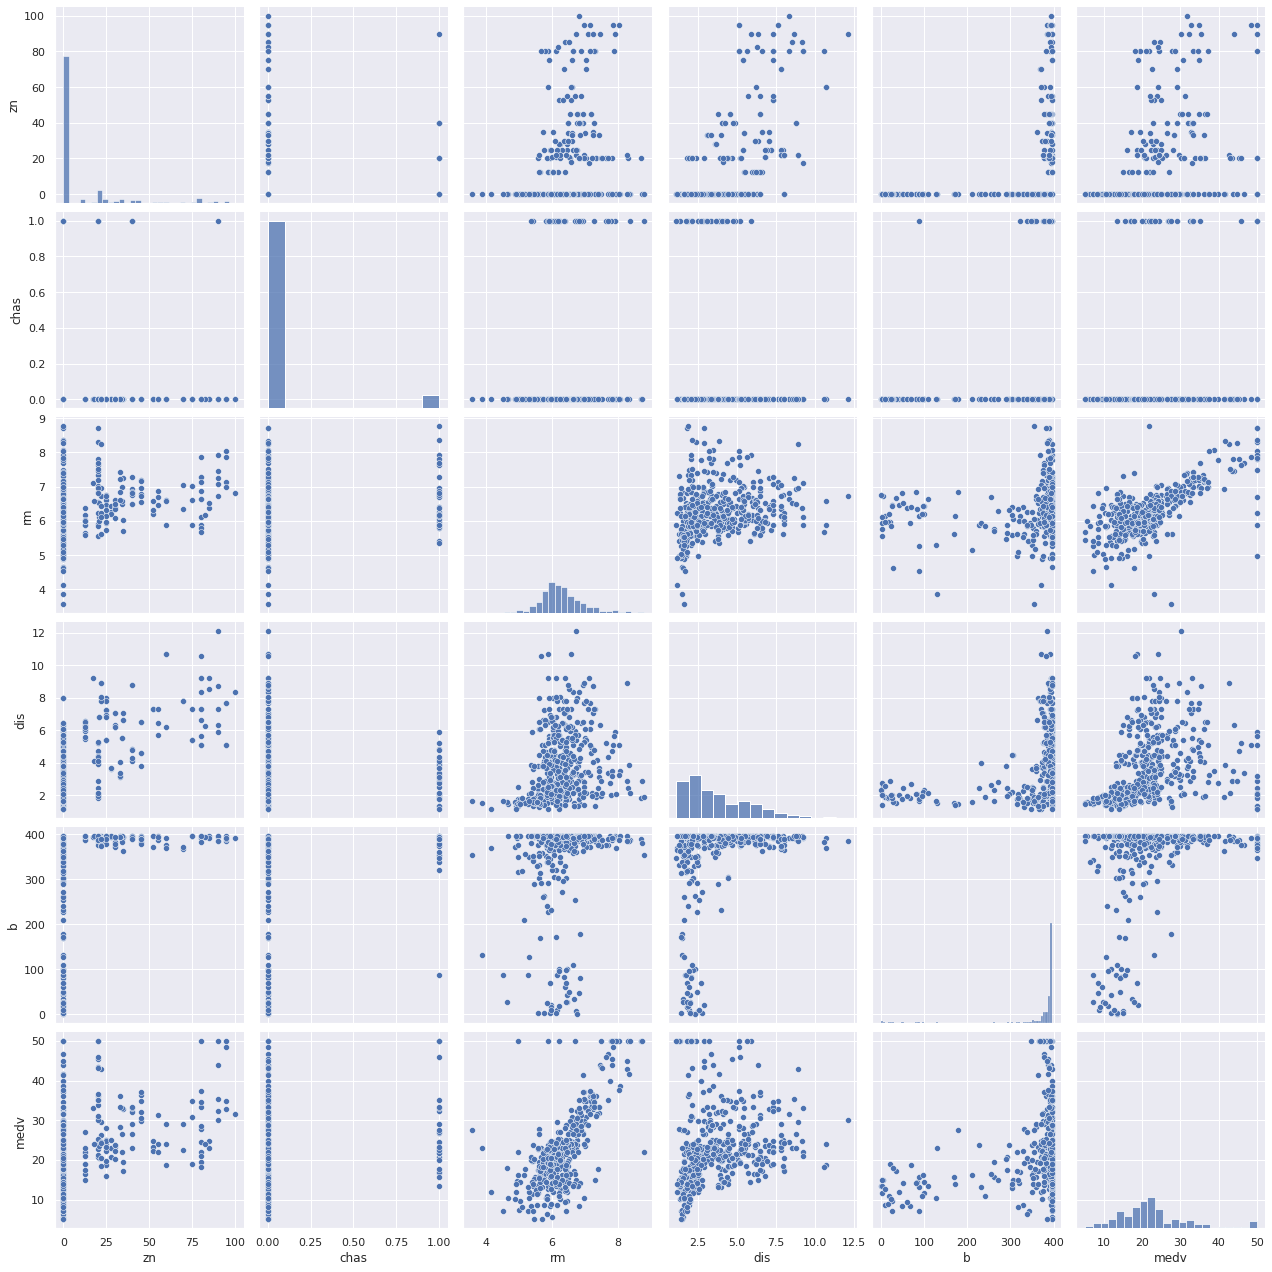

In [ ]:
sns.set()
cols = ['zn', 'chas', 'rm', 'dis', 'b', 'medv']
sns.pairplot(df_train[cols], size = 3)
plt.show()

In [ ]:
# ZN, CHAS, RM, DIS, B

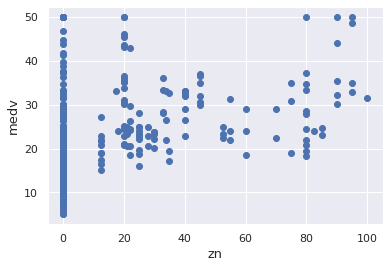

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['zn'], y = df_train['medv'])
plt.ylabel('medv', fontsize=13)
plt.xlabel('zn', fontsize=13)
plt.show()

# ZN: 25,000 피트를 초과하는 주거용 토지의 비율
# 25,000 피트를 넘지 않아도 가격이 높음 -> 그 비율이 높음. 

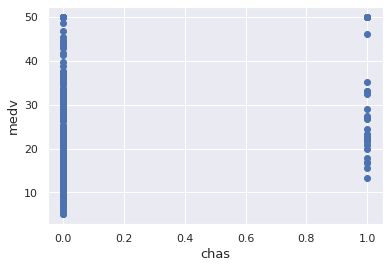

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['chas'], y = df_train['medv'])
plt.ylabel('medv', fontsize=13)
plt.xlabel('chas', fontsize=13)
plt.show()

# CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
# 강 근처에 있으면 대체적으로(?) 가격대가 좀 있다..? 이런 경우는 거의 없는 거 같음

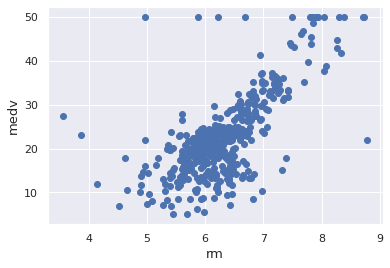

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['rm'], y = df_train['medv'])
plt.ylabel('medv', fontsize=13)
plt.xlabel('rm', fontsize=13)
plt.show()

# RM: 주택당 평균 방의 개수
# 이 부분에서 이상치가 좀 보이니깐 전처리를 해 봐야 할 거 같음!!

In [ ]:
# 이상치로 보이는 요소만 뽑아서 제거해 봅시다!

In [ ]:
df_train[(df_train.medv == 50) & (df_train.rm > 4) & (df_train.rm < 7)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
213,9.232,0.000,18.100,0.000,0.631,6.216,100.000,1.169,24.000,666.000,20.200,366.150,9.530,50.000
288,5.670,0.000,18.100,1.000,0.631,6.683,96.800,1.357,24.000,666.000,20.200,375.330,3.730,50.000
292,4.898,0.000,18.100,0.000,0.631,4.970,100.000,1.333,24.000,666.000,20.200,375.520,3.260,50.000
396,8.267,0.000,18.100,1.000,0.668,5.875,89.600,1.130,24.000,666.000,20.200,347.880,8.880,50.000


In [ ]:
df_train[(df_train.medv < 30) & (df_train.rm > 8)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
249,3.474,0.000,18.100,1.000,0.718,8.780,82.900,1.905,24.000,666.000,20.200,354.550,5.290,21.900


In [ ]:
df_train[df_train.rm < 4]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
278,13.522,0.000,18.100,0.000,0.631,3.863,100.000,1.511,24.000,666.000,20.200,131.420,13.330,23.100
421,4.556,0.000,18.100,0.000,0.718,3.561,87.900,1.613,24.000,666.000,20.200,354.700,7.120,27.500


In [ ]:
# df_train.drop(index=[213,288,292,396,249,278,421], inplace=True) -> overfit

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     455 non-null    float64
 1   zn       455 non-null    float64
 2   indus    455 non-null    float64
 3   chas     455 non-null    float64
 4   nox      455 non-null    float64
 5   rm       455 non-null    float64
 6   age      455 non-null    float64
 7   dis      455 non-null    float64
 8   rad      455 non-null    float64
 9   tax      455 non-null    float64
 10  ptratio  455 non-null    float64
 11  b        455 non-null    float64
 12  lstat    455 non-null    float64
 13  medv     455 non-null    float64
dtypes: float64(14)
memory usage: 49.9 KB


<AxesSubplot:xlabel='rm'>

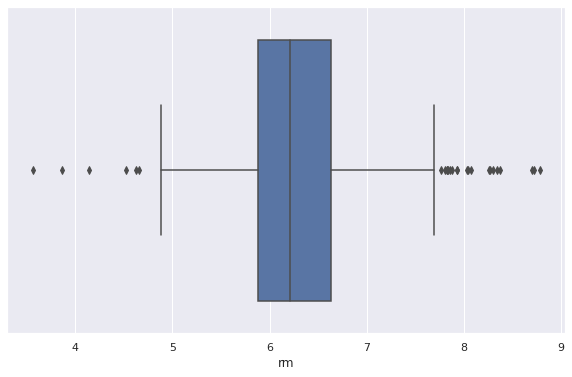

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_train.rm)

In [ ]:
# df_train = df_train[(df_train.rm > 4) & (df_train.rm <= 8.5)]

# df_train.shape  -> overfit

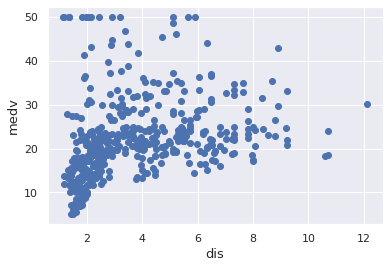

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['dis'], y = df_train['medv'])
plt.ylabel('medv', fontsize=13)
plt.xlabel('dis', fontsize=13)
plt.show()

# DIS: 5개의 보스턴 고용 센터와의 거리
# 산점도의 분포가 흩어져 있는 것으로 보아, 이것도 좀 고민....

<AxesSubplot:xlabel='dis'>

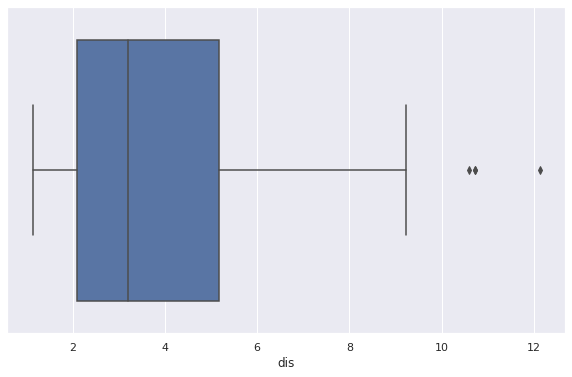

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_train.dis)

In [ ]:
# df_train = df_train[df_train.dis < 10]
# df_train.shape  -> overfit ㅠㅠ

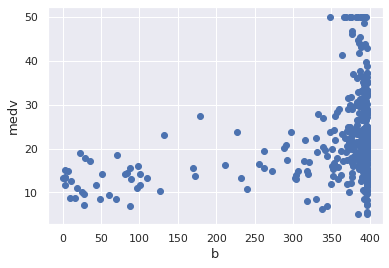

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['b'], y = df_train['medv'])
plt.ylabel('medv', fontsize=13)
plt.xlabel('b', fontsize=13)
plt.show()

# B: 마을의 흑인 거주 비율

In [ ]:
# df_train["b"] = np.log1p(df_train["b"])

In [ ]:
# fig, ax = plt.subplots()
# ax.scatter(x = df_train['b'], y = df_train['medv'])
# plt.ylabel('medv', fontsize=13)
# plt.xlabel('b', fontsize=13)
# plt.show()

In [ ]:
# plt.figure(figsize=(10,6))
# sns.boxplot(x=df_train.b)

In [ ]:
# df_train = df_train[df_train.b > 2]
# df_train.shape  -> 자연로그 취해서 이상치를 임의로 제거했다가 score 4점대...overfit

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 22.57 and sigma = 9.11



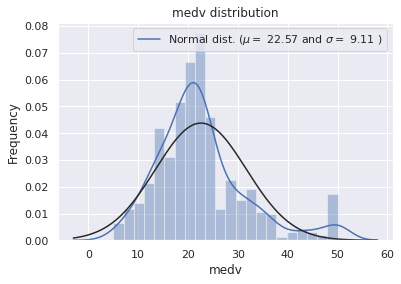

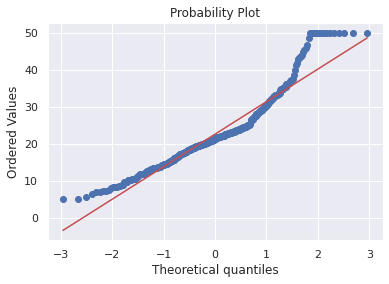

In [ ]:
sns.distplot(df_train['medv'] , fit=norm);

(mu, sigma) = norm.fit(df_train['medv'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('medv distribution')

fig = plt.figure()
res = stats.probplot(df_train['medv'], plot=plt)
plt.show()

# mu는 각 관련 다변량 정규분포의 평균을 결정
# Sigma는 각 관련 다변량 정규분포의 공분산을 결정

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 3.09 and sigma = 0.38



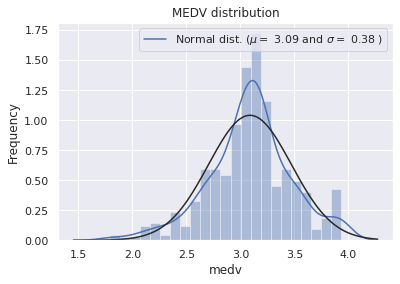

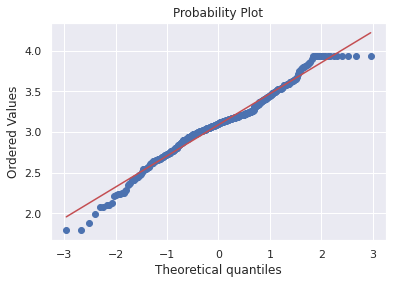

In [ ]:
df_train["medv"] = np.log1p(df_train["medv"])  # 자연로그 -> 왜도를 완화

sns.distplot(df_train['medv'] , fit=norm);

(mu, sigma) = norm.fit(df_train['medv'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('MEDV distribution')

fig = plt.figure()
res = stats.probplot(df_train['medv'], plot=plt)
plt.show()

Features preprocessing

In [ ]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.medv.values
full_df = pd.concat((df_train, df_test)).reset_index(drop=True)
full_df.drop(['medv'], axis=1, inplace=True)
print("full_df의 크기는 : {}".format(full_df.shape))

# train, test 합쳐서 full_df

full_df의 크기는 : (506, 13)


In [ ]:
full_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.048,80.000,3.640,0.000,0.392,6.108,32.000,9.220,1.000,315.000,16.400,392.890,6.570
1,1.425,0.000,19.580,0.000,0.871,6.510,100.000,1.766,5.000,403.000,14.700,364.310,7.390
2,0.018,95.000,1.470,0.000,0.403,7.135,13.900,7.653,3.000,402.000,17.000,384.300,4.450
3,9.514,0.000,18.100,0.000,0.713,6.728,94.100,2.496,24.000,666.000,20.200,6.680,18.710
4,1.657,0.000,19.580,0.000,0.871,6.122,97.300,1.618,5.000,403.000,14.700,372.800,14.100


In [ ]:
full_df_na = (full_df.isnull().sum() / len(full_df)) * 100
full_df_na = full_df_na.drop(full_df_na[full_df_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :full_df_na})
missing_data.head(10)

# null 값 없음

,Missing Ratio


correlation_features

<AxesSubplot:>

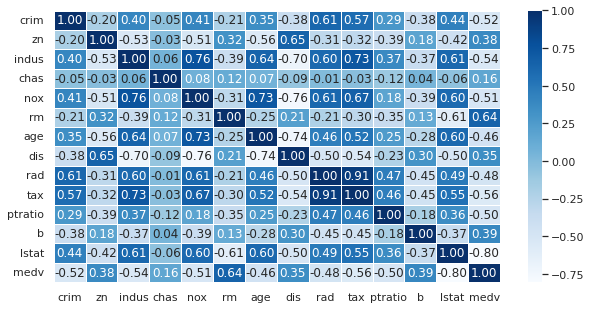

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data=df_train.corr(), annot=True,
           fmt='.2f', linewidth=.5, cmap='Blues')

# 여기까지는 전처리 완성.

In [ ]:
# full_df["crim"] = np.log1p(full_df["crim"])
# full_df["zn"] = np.log1p(full_df["zn"])
# full_df["indus"] = np.log1p(full_df["indus"])
# full_df["nox"] = np.log1p(full_df["nox"])
# full_df["rm"] = np.log1p(full_df["rm"])
# full_df["age"] = np.log1p(full_df["age"])
# full_df["dis"] = np.log1p(full_df["dis"])
# full_df["rad"] = np.log1p(full_df["rad"])
# full_df["tax"] = np.log1p(full_df["tax"])
# full_df["ptratio"] = np.log1p(full_df["ptratio"])
# full_df["b"] = np.log1p(full_df["b"])
# full_df["lstat"] = np.log1p(full_df["lstat"])

In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
# full_df.head()

In [ ]:
# 집 가격을 책정하는 데 중요한 포인트가 바로 주택의 방 개수 -> 집의 크기 그러므로 rm을 가지고 여러 칼럼을 만들어 봄
# (개선) rm뿐만 아니라 zn, chas, dis, b 모두 양의 상관관계. 이를 활용하여 column 생성.

In [ ]:
# 25000초과 비율에 따른 rm
full_df['zn_t_rm'] = full_df['rm'] / full_df['zn']
full_df.zn_t_rm.replace(np.inf, 0.0, inplace=True)
full_df['zn_t_rm'] = full_df['zn_t_rm']*100
full_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,zn_t_rm
0,0.048,80.000,3.640,0.000,0.392,6.108,32.000,9.220,1.000,315.000,16.400,392.890,6.570,7.635
1,1.425,0.000,19.580,0.000,0.871,6.510,100.000,1.766,5.000,403.000,14.700,364.310,7.390,0.000
2,0.018,95.000,1.470,0.000,0.403,7.135,13.900,7.653,3.000,402.000,17.000,384.300,4.450,7.511
3,9.514,0.000,18.100,0.000,0.713,6.728,94.100,2.496,24.000,666.000,20.200,6.680,18.710,0.000
4,1.657,0.000,19.580,0.000,0.871,6.122,97.300,1.618,5.000,403.000,14.700,372.800,14.100,0.000


In [ ]:
# 찰스강 경계에 따른 rm
full_df['chas_t_rm'] = full_df['rm'] / full_df['chas']
full_df['chas_t_rm'].replace(np.inf, 0.0, inplace=True)
full_df['chas_t_rm'].value_counts()
full_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,zn_t_rm,chas_t_rm
0,0.048,80.000,3.640,0.000,0.392,6.108,32.000,9.220,1.000,315.000,16.400,392.890,6.570,7.635,0.000
1,1.425,0.000,19.580,0.000,0.871,6.510,100.000,1.766,5.000,403.000,14.700,364.310,7.390,0.000,0.000
2,0.018,95.000,1.470,0.000,0.403,7.135,13.900,7.653,3.000,402.000,17.000,384.300,4.450,7.511,0.000
3,9.514,0.000,18.100,0.000,0.713,6.728,94.100,2.496,24.000,666.000,20.200,6.680,18.710,0.000,0.000
4,1.657,0.000,19.580,0.000,0.871,6.122,97.300,1.618,5.000,403.000,14.700,372.800,14.100,0.000,0.000


In [ ]:
# 보스턴 주민센터 거리에 따른 rm
full_df['dis_t_rm'] = full_df['rm'] / full_df['dis']
full_df['dis_t_rm'].value_counts()
full_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,zn_t_rm,chas_t_rm,dis_t_rm
0,0.048,80.000,3.640,0.000,0.392,6.108,32.000,9.220,1.000,315.000,16.400,392.890,6.570,7.635,0.000,0.662
1,1.425,0.000,19.580,0.000,0.871,6.510,100.000,1.766,5.000,403.000,14.700,364.310,7.390,0.000,0.000,3.687
2,0.018,95.000,1.470,0.000,0.403,7.135,13.900,7.653,3.000,402.000,17.000,384.300,4.450,7.511,0.000,0.932
3,9.514,0.000,18.100,0.000,0.713,6.728,94.100,2.496,24.000,666.000,20.200,6.680,18.710,0.000,0.000,2.695
4,1.657,0.000,19.580,0.000,0.871,6.122,97.300,1.618,5.000,403.000,14.700,372.800,14.100,0.000,0.000,3.784


In [ ]:
full_df['b'] = np.log1p(full_df['b']) # 단위가 다르므로 정규화
# full_df['b']

In [ ]:
full_df.b.value_counts()

5.986    121
5.978      3
5.982      3
5.977      2
5.968      2
        ... 
5.957      1
5.929      1
5.975      1
5.982      1
5.873      1
Name: b, Length: 357, dtype: int64

In [ ]:
full_df['b_t_rm'] = full_df['rm'] / full_df['b']
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   crim       506 non-null    float64
 1   zn         506 non-null    float64
 2   indus      506 non-null    float64
 3   chas       506 non-null    float64
 4   nox        506 non-null    float64
 5   rm         506 non-null    float64
 6   age        506 non-null    float64
 7   dis        506 non-null    float64
 8   rad        506 non-null    float64
 9   tax        506 non-null    float64
 10  ptratio    506 non-null    float64
 11  b          506 non-null    float64
 12  lstat      506 non-null    float64
 13  zn_t_rm    506 non-null    float64
 14  chas_t_rm  506 non-null    float64
 15  dis_t_rm   506 non-null    float64
 16  b_t_rm     506 non-null    float64
dtypes: float64(17)
memory usage: 67.3 KB


In [ ]:
full_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,zn_t_rm,chas_t_rm,dis_t_rm,b_t_rm
0,0.048,80.000,3.640,0.000,0.392,6.108,32.000,9.220,1.000,315.000,16.400,5.976,6.570,7.635,0.000,0.662,1.022
1,1.425,0.000,19.580,0.000,0.871,6.510,100.000,1.766,5.000,403.000,14.700,5.901,7.390,0.000,0.000,3.687,1.103
2,0.018,95.000,1.470,0.000,0.403,7.135,13.900,7.653,3.000,402.000,17.000,5.954,4.450,7.511,0.000,0.932,1.198
3,9.514,0.000,18.100,0.000,0.713,6.728,94.100,2.496,24.000,666.000,20.200,2.039,18.710,0.000,0.000,2.695,3.300
4,1.657,0.000,19.580,0.000,0.871,6.122,97.300,1.618,5.000,403.000,14.700,5.924,14.100,0.000,0.000,3.784,1.033


- 이것저것 더 만들어 봤지만, 오히려 역효과..

In [ ]:
# full_df['rm_t_zn'] = full_df['zn'] / full_df['rm']
# full_df.info()

In [ ]:
# dis에 따른 zn
# full_df['dis_t_zn'] = full_df['zn'] / full_df['dis']
# full_df.info()

In [ ]:
# b에 따른 zn
# full_df['b_t_zn'] = full_df['zn'] / full_df['b']
# full_df.info()

In [ ]:
# full_df['zn_t_dis'] = full_df['dis'] / full_df['zn']
# full_df.zn_t_dis.replace(np.inf, 0.0, inplace=True)
# full_df.head()

In [ ]:
# full_df['rm_t_dis'] = full_df['dis'] / full_df['rm']

In [ ]:
# b에 따른 dis
# full_df['b_t_dis'] = full_df['dis'] / full_df['b']
# full_df.info()

In [ ]:
# full_df['zn_t_b'] = full_df['b'] / full_df['zn']
# full_df.zn_t_b.replace(np.inf, 0.0, inplace=True)
# full_df.head()

In [ ]:
# full_df['rm_t_b'] = full_df['b'] / full_df['rm']

In [ ]:
# full_df['dis_t_b'] = full_df['b'] / full_df['dis']
# full_df.info()

In [ ]:
# full_df.head()

In [ ]:
numeric_feats = full_df.dtypes[full_df.dtypes != "object"].index
numeric_feats

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'zn_t_rm', 'chas_t_rm', 'dis_t_rm', 'b_t_rm'],
      dtype='object')

왜도 (Skewness)  

- 분포의 비대칭도  
- 정규분포 = 왜도 0  
- 왼쪽으로 치우침 = 왜도 > 0  
- 오른쪽으로 치우침 = 왜도 < 0  

In [ ]:
skewed_feats = full_df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(26)

# 왜도 정도


Skew in numerical features: 



,Skew
b_t_rm,19.009
crim,5.208
chas_t_rm,3.511
chas,3.396
zn,2.219
zn_t_rm,2.044
dis,1.009
rad,1.002
lstat,0.904
nox,0.727


In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    full_df[feat] = boxcox1p(full_df[feat], lam)

There are 17 skewed numerical features to Box Cox transform


In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   crim       506 non-null    float64
 1   zn         506 non-null    float64
 2   indus      506 non-null    float64
 3   chas       506 non-null    float64
 4   nox        506 non-null    float64
 5   rm         506 non-null    float64
 6   age        506 non-null    float64
 7   dis        506 non-null    float64
 8   rad        506 non-null    float64
 9   tax        506 non-null    float64
 10  ptratio    506 non-null    float64
 11  b          506 non-null    float64
 12  lstat      506 non-null    float64
 13  zn_t_rm    506 non-null    float64
 14  chas_t_rm  506 non-null    float64
 15  dis_t_rm   506 non-null    float64
 16  b_t_rm     506 non-null    float64
dtypes: float64(17)
memory usage: 67.3 KB


In [ ]:
all_data = pd.get_dummies(full_df)
print(all_data.head())
print('\n')
print(all_data.shape)

   crim    zn  indus  chas   nox    rm   age   dis   rad    tax  ptratio  \
0 0.047 6.221  1.726 0.000 0.339 2.280 4.597 2.781 0.730  9.141    3.566   
1 0.947 0.000  3.827 0.000 0.657 2.354 6.655 1.099 2.056  9.734    3.409   
2 0.018 6.554  0.968 0.000 0.347 2.463 3.331 2.548 1.541  9.728    3.618   
3 2.821 0.000  3.710 0.000 0.561 2.393 6.535 1.377 4.138 11.015    3.874   
4 1.052 0.000  3.827 0.000 0.657 2.283 6.601 1.035 2.056  9.734    3.409   

      b  lstat  zn_t_rm  chas_t_rm  dis_t_rm  b_t_rm  
0 2.255  2.365    2.545      0.000     0.528   0.743  
1 2.241  2.506    0.000      0.000     1.738   0.787  
2 2.251  1.931    2.525      0.000     0.692   0.836  
3 1.209  3.759    0.000      0.000     1.444   1.631  
4 2.245  3.351    0.000      0.000     1.764   0.749  


(506, 17)


In [ ]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   crim       455 non-null    float64
 1   zn         455 non-null    float64
 2   indus      455 non-null    float64
 3   chas       455 non-null    float64
 4   nox        455 non-null    float64
 5   rm         455 non-null    float64
 6   age        455 non-null    float64
 7   dis        455 non-null    float64
 8   rad        455 non-null    float64
 9   tax        455 non-null    float64
 10  ptratio    455 non-null    float64
 11  b          455 non-null    float64
 12  lstat      455 non-null    float64
 13  zn_t_rm    455 non-null    float64
 14  chas_t_rm  455 non-null    float64
 15  dis_t_rm   455 non-null    float64
 16  b_t_rm     455 non-null    float64
dtypes: float64(17)
memory usage: 60.6 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 455 to 505
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   crim       51 non-null     float64
 1   zn         51 non-null     float64
 2   indus      51 non-null     float64
 3   chas       51 non-null     float64
 4   nox        51 non-null     float64
 5   rm         51 non-null     float64
 6   age        51 non-null     float64
 7   dis        51 non-null     float64
 8   rad        51 non-null     float64
 9   tax        51 non-null     float64
 10  ptratio    51 non-null     float64
 11  b          51 non-null     float64
 12  lstat      51 non-null     float64
 13  zn_t_rm    51 non-null     float64
 14  chas_t_rm  51 non-null     float64
 15  dis_t_rm   51 non-null     float64
 16  b_t_rm     51 non-null     float64
dtypes: float64(17)
memory usage: 6.9 KB


In [ ]:
train.columns[0:-1]

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'zn_t_rm', 'chas_t_rm', 'dis_t_rm'],
      dtype='object')

In [ ]:
test.columns[0:-1]

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'zn_t_rm', 'chas_t_rm', 'dis_t_rm'],
      dtype='object')

In [ ]:
scaler = StandardScaler()

train = scaler.fit_transform(train[train.columns[0:-1]])
test = scaler.fit_transform(test[test.columns[0:-1]])

# 완성된 train, test를 정규화 시켜서 scale을 같게 만들어 준다.

Modeling

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [ ]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train)
    rmse= np.sqrt(-cross_val_score(model, train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [ ]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1785 (0.0203)



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.208e-02, tolerance: 5.432e-03
  model = cd_fast.enet_coordinate_descent(


In [ ]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [ ]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1786 (0.0203)



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.680e-02, tolerance: 5.432e-03
  model = cd_fast.enet_coordinate_descent(


In [ ]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [ ]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1478 (0.0225)



In [ ]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [ ]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1446 (0.0183)



In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [ ]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[00:40:35] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[00:40:35] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[00:40:36] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[00:40:37] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[00:40:38] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Xgboost score: 0.1515 (0.0162)



In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [ ]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1546 (0.0240)



In [ ]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [ ]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.680e-02, tolerance: 5.432e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.208e-02, tolerance: 5.432e-03
  model = cd_fast.enet_coordinate_descent(


 Averaged base models score: 0.1496 (0.0206)



In [ ]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [ ]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.821e-03, tolerance: 4.522e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.483e-02, tolerance: 4.470e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.483e-02, tolerance: 4.271e-03

Stacking Averaged models score: 0.1373 (0.0221)


In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
stacked_averaged_models.fit(train, y_train)
stacked_train_pred = stacked_averaged_models.predict(train)
stacked_pred = np.expm1(stacked_averaged_models.predict(test))
print(rmsle(y_train, stacked_train_pred))

0.06699541690604363


In [ ]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

[00:47:05] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

0.08858561922541015


In [ ]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test))
print(rmsle(y_train, lgb_train_pred))

0.0747239060498315


In [ ]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.9 +
               xgb_train_pred*0.05 + lgb_train_pred*0.05 ))  # parameter를 계속 수정해서 제출한 결과 - stacked의 비중을 가장 높게!

RMSLE score on train data:
0.06694558051937899


In [ ]:
ensemble = stacked_pred*0.9 + xgb_pred*0.05 + lgb_pred*0.05

In [ ]:
sub = pd.DataFrame()
sub['ID'] = test_ID
sub['MEDV'] = ensemble
sub.to_csv('submission_30.csv',index=False)

- normality  
- homoscedasticity  
- linearity  
- Absence of correlated errors